In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import preprocessing
from kneed import KneeLocator
import warnings
warnings.filterwarnings('ignore')


data_mvp_ml = pd.read_csv(os.path.join('3_output','data_mvp_final_ml.csv'),index_col=0).convert_dtypes()

In [2]:
data_mvp_ml.info()
data_mvp_ml.isna().sum()
data_mvp_ml.nunique()


<class 'pandas.core.frame.DataFrame'>
Index: 109186 entries, 0 to 310039
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   pelicula_id           109186 non-null  Int64  
 1   title                 109186 non-null  string 
 2   popularity            109186 non-null  Float64
 3   vote_average          109186 non-null  Float64
 4   release_year          109186 non-null  Int64  
 5   franquicia            109186 non-null  string 
 6   original_language     109186 non-null  string 
 7   prtgnst_name          109186 non-null  string 
 8   prtgnst_gender_strng  109186 non-null  string 
 9   prtgnst_nivel         109186 non-null  string 
 10  director              109186 non-null  string 
 11  executive_producer    109186 non-null  string 
dtypes: Float64(2), Int64(2), string(8)
memory usage: 11.2 MB


pelicula_id             45346
title                   42196
popularity              43719
vote_average               92
release_year              135
franquicia               1696
original_language          90
prtgnst_name            29980
prtgnst_gender_strng        3
prtgnst_nivel               3
director                18375
executive_producer       9791
dtype: int64

In [3]:
vars_num=[
    'popularity',
    'vote_average',
    'release_year'
    ]

vars_cat=[
    'franquicia',
    'original_language',
    #'prtgnst_name', # excluimos por cantidad de valores unicos
    'prtgnst_gender_strng'#,
    #'prtgnst_nivel' # filtramos; nos concentramos unicamente en el genero de protagonistas
    #'director', # excluimos por cantidad de valores unicos
    #'executive_producer'
    ]

In [4]:
data_mvp_ml_indexed=data_mvp_ml.set_index('pelicula_id')

# filtramos 'prtgnst_nivel' == 1; es decir, en el genero del protagonista (excluimos actores secundarios)
data_mvp_ml_indexed=data_mvp_ml_indexed.loc[data_mvp_ml_indexed['prtgnst_nivel'].isin(['1'])]

data_mvp_ml_indexed_cat=data_mvp_ml_indexed[vars_cat].drop_duplicates()
data_mvp_ml_indexed_cat.info()
data_mvp_ml_indexed_cat.head()
data_mvp_ml_indexed_cat.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 2055 entries, 862 to 182030
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   franquicia            2055 non-null   string
 1   original_language     2055 non-null   string
 2   prtgnst_gender_strng  2055 non-null   string
dtypes: string(3)
memory usage: 66.2 KB


franquicia              0
original_language       0
prtgnst_gender_strng    0
dtype: int64

In [5]:
data_mvp_ml_indexed_dummies = pd.get_dummies(
    data=data_mvp_ml_indexed_cat,
    columns=vars_cat, # genera dummies para cada grupo de valor por columna:
    drop_first=True, # elimina las variables reduntantes por columna
    dtype=float # dummies en valore numerico
    )
data_mvp_ml_indexed_dummies.info()
data_mvp_ml_indexed_dummies.head(3)
all(data_mvp_ml_indexed_dummies.isna().sum()==0)

<class 'pandas.core.frame.DataFrame'>
Index: 2055 entries, 862 to 182030
Columns: 1695 entries, franquicia_00 Schneider Filmreihe to prtgnst_gender_strng_mujer
dtypes: float64(1695)
memory usage: 26.6 MB


True

In [6]:
# correlation matrix
# filter values higher than 0.75 across the matrix.


In [7]:
random_state=0
pca_cat_eval = PCA(
    random_state=random_state,
    svd_solver = 'arpack')
pca_cat_eval.fit(data_mvp_ml_indexed_dummies)

PCA(random_state=0, svd_solver='arpack')

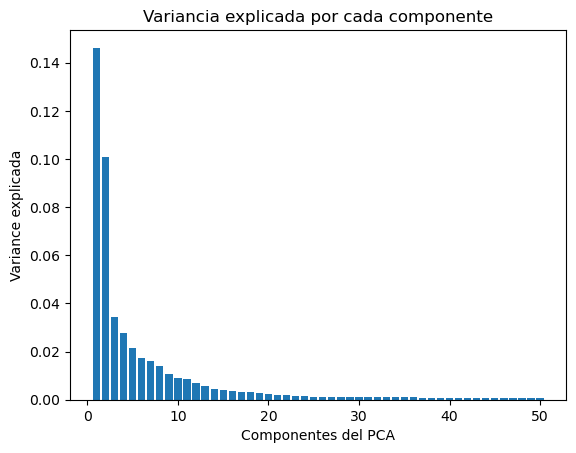

In [8]:
# Bar plot of explained_variance
plt.bar(range(1,51),pca_cat_eval.explained_variance_ratio_[0:50])
 
 
plt.xlabel('Componentes del PCA')
plt.ylabel('Variance explicada')
plt.title('Variancia explicada por cada componente')
plt.show()

In [9]:
pca_varnce_cumul = np.cumsum(pca_cat_eval.explained_variance_ratio_[0:40])[-1]
print("Varianza acumulada explicada por los componentes 1 al 40:",
      round(pca_varnce_cumul,2)*100,"% del total de la varianza")

Varianza acumulada explicada por los componentes 1 al 40: 47.0 % del total de la varianza


In [10]:
# Convertimos realse_year a categorias con niveles: mejor es max_min scalar.
pca_cat = PCA( # instanciamos
    n_components=40,
    random_state=random_state,
    svd_solver = 'arpack') 
pca_components = pca_cat.fit_transform(data_mvp_ml_indexed_dummies) # ajustamos

# extraemos los valores por componente para fila
data_mvp_ml_cat_pca = pd.DataFrame(
    data = pca_components,
    columns=[f"pca_{num}" for num in range(1, 41)], # loop en forma list comprehension para nombrar columnas
    index=data_mvp_ml_indexed_dummies.index
    )

In [11]:

data_mvp_ml_cat_pca.info()
data_mvp_ml_cat_pca.head()


<class 'pandas.core.frame.DataFrame'>
Index: 2055 entries, 862 to 182030
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pca_1   2055 non-null   float64
 1   pca_2   2055 non-null   float64
 2   pca_3   2055 non-null   float64
 3   pca_4   2055 non-null   float64
 4   pca_5   2055 non-null   float64
 5   pca_6   2055 non-null   float64
 6   pca_7   2055 non-null   float64
 7   pca_8   2055 non-null   float64
 8   pca_9   2055 non-null   float64
 9   pca_10  2055 non-null   float64
 10  pca_11  2055 non-null   float64
 11  pca_12  2055 non-null   float64
 12  pca_13  2055 non-null   float64
 13  pca_14  2055 non-null   float64
 14  pca_15  2055 non-null   float64
 15  pca_16  2055 non-null   float64
 16  pca_17  2055 non-null   float64
 17  pca_18  2055 non-null   float64
 18  pca_19  2055 non-null   float64
 19  pca_20  2055 non-null   float64
 20  pca_21  2055 non-null   float64
 21  pca_22  2055 non-null   float64
 22  p

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,...,pca_31,pca_32,pca_33,pca_34,pca_35,pca_36,pca_37,pca_38,pca_39,pca_40
pelicula_id,,,,,,,,,,,,,,,,,,,,,
862,-0.369568,-0.262730,-0.001214,0.025879,0.014292,-0.000581,-0.004866,-0.006680,-0.005128,0.000188,...,-0.000701,0.000343,-8.111293e-17,0.000141,0.000051,0.000001,-0.000744,-1.660979e-15,0.000697,-0.000804
8844,-0.212519,-0.165772,-0.538235,0.733173,0.316331,0.010875,-0.072784,-0.088471,-0.151154,0.017054,...,-0.035368,-0.004429,2.265013e-15,-0.018579,-0.000578,-0.017087,-0.017329,-6.546151e-16,0.000362,-0.001219
15602,-0.369568,-0.262730,-0.001214,0.025879,0.014292,-0.000581,-0.004866,-0.006680,-0.005128,0.000188,...,-0.000701,0.000343,-7.848268e-17,0.000141,0.000051,0.000001,-0.000744,-1.681354e-15,0.000697,-0.000804
31357,-0.300635,0.825043,-0.516081,0.656625,0.281942,0.014115,-0.058999,-0.068601,-0.141937,0.017292,...,-0.031850,-0.004197,2.184312e-15,-0.018951,-0.000707,-0.017156,-0.016413,-2.079328e-15,0.000891,-0.000085
11862,-0.369568,-0.262730,-0.001214,0.025879,0.014292,-0.000581,-0.004866,-0.006680,-0.005128,0.000188,...,-0.000701,0.000343,-7.553244e-17,0.000141,0.000051,0.000001,-0.000744,-1.663742e-15,0.000697,-0.000804


In [12]:
data_mvp_ml_cat_pca_2join=data_mvp_ml_cat_pca.reset_index()
print(data_mvp_ml_cat_pca_2join.shape)
data_mvp_ml_num=data_mvp_ml_indexed[vars_num].reset_index().drop_duplicates()
print(data_mvp_ml_num.shape)
data_mvp_ml_num.head()

(2055, 41)
(36432, 4)


,pelicula_id,popularity,vote_average,release_year
0,862,21.946943,7.7,1995
2,8844,17.015539,6.9,1995
5,15602,11.7129,6.5,1995
6,31357,3.859495,6.1,1995
7,11862,8.387519,5.7,1995


In [13]:
data_mvp_ml_pcacat=pd.merge(
    data_mvp_ml_num,
    data_mvp_ml_cat_pca_2join,
    on='pelicula_id',
    how='left'
)
data_mvp_ml_pcacat.info()
data_mvp_ml_pcacat.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36432 entries, 0 to 36431
Data columns (total 44 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pelicula_id   36432 non-null  Int64  
 1   popularity    36432 non-null  Float64
 2   vote_average  36432 non-null  Float64
 3   release_year  36432 non-null  Int64  
 4   pca_1         2055 non-null   float64
 5   pca_2         2055 non-null   float64
 6   pca_3         2055 non-null   float64
 7   pca_4         2055 non-null   float64
 8   pca_5         2055 non-null   float64
 9   pca_6         2055 non-null   float64
 10  pca_7         2055 non-null   float64
 11  pca_8         2055 non-null   float64
 12  pca_9         2055 non-null   float64
 13  pca_10        2055 non-null   float64
 14  pca_11        2055 non-null   float64
 15  pca_12        2055 non-null   float64
 16  pca_13        2055 non-null   float64
 17  pca_14        2055 non-null   float64
 18  pca_15        2055 non-nul

,pelicula_id,popularity,vote_average,release_year,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,...,pca_31,pca_32,pca_33,pca_34,pca_35,pca_36,pca_37,pca_38,pca_39,pca_40
0,862,21.946943,7.7,1995,-0.369568,-0.262730,-0.001214,0.025879,0.014292,-0.000581,...,-0.000701,0.000343,-8.111293e-17,0.000141,0.000051,0.000001,-0.000744,-1.660979e-15,0.000697,-0.000804
1,8844,17.015539,6.9,1995,-0.212519,-0.165772,-0.538235,0.733173,0.316331,0.010875,...,-0.035368,-0.004429,2.265013e-15,-0.018579,-0.000578,-0.017087,-0.017329,-6.546151e-16,0.000362,-0.001219
2,15602,11.7129,6.5,1995,-0.369568,-0.262730,-0.001214,0.025879,0.014292,-0.000581,...,-0.000701,0.000343,-7.848268e-17,0.000141,0.000051,0.000001,-0.000744,-1.681354e-15,0.000697,-0.000804
3,31357,3.859495,6.1,1995,-0.300635,0.825043,-0.516081,0.656625,0.281942,0.014115,...,-0.031850,-0.004197,2.184312e-15,-0.018951,-0.000707,-0.017156,-0.016413,-2.079328e-15,0.000891,-0.000085
4,11862,8.387519,5.7,1995,-0.369568,-0.262730,-0.001214,0.025879,0.014292,-0.000581,...,-0.000701,0.000343,-7.553244e-17,0.000141,0.000051,0.000001,-0.000744,-1.663742e-15,0.000697,-0.000804
